In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from functools import lru_cache

In [3]:
print('Hola')

Hola


# How to find the roots of a polynomial 🦀

In [19]:
def const_coeff(z, rho_r, rho_m, lamb):
    return -(lamb + rho_r * (1 + z) ** 4 + rho_m * (1 + z) ** 3) / 3

def sixth_coeff(kappa, beta):
    return 16 * kappa * beta

In [20]:
@lru_cache(maxsize=1024**2)
def hubble(z, rho_r, rho_m, lamb, kappa, beta):
    """"""
    coeff6 = sixth_coeff(kappa, beta)
    coeff0 = const_coeff(z, rho_r, rho_m, lamb)
    
    poly_coeffs = (coeff6, 0, 0, 0, 1, 0, coeff0)
    hubble_poly_roots = roots(poly_coeffs)
    
    roots_cond = logical_and(absolute(hubble_poly_roots.imag) <= 1e-8, hubble_poly_roots.real >= 0)
#     hubble_poly_roots[roots_cond].real >= 0
    
    return hubble_poly_roots[roots_cond].real

In [21]:
rho_r = 1e-5
rho_m = 0.3
lamb = 0.7 
kappa = 1
beta = 0


red_shift = 1100
hubble(red_shift, rho_r, rho_m, lamb, kappa, beta)

array([ 11762.7137408])

In [22]:
rho_r = 1e-5
rho_m = 0.3
lamb = 0.7
kappa = 1

beta_0 = 0
beta_1 = 1e-7

red_shift_array = geomspace(1e-2, 1100, 2048)
hubble_array_0 = []
for red_shift in red_shift_array:
    hv = hubble(red_shift, rho_r, rho_m, lamb, kappa, beta_0)
    hubble_array_0.append(hv)
    
hubble_array_0 = array(hubble_array_0)
    
hubble_array_1 = []
for red_shift in red_shift_array:
    hv = hubble(red_shift, rho_r, rho_m, lamb, kappa, beta_1)
    hubble_array_1.append(hv)
    
hubble_array_1 = array(hubble_array_1)

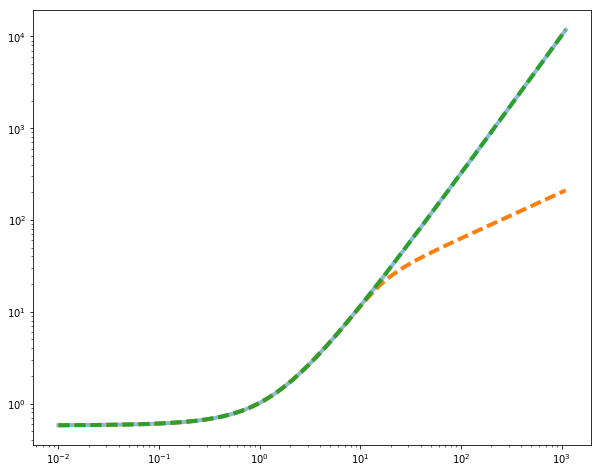

In [23]:
figure(figsize=(10, 8))

plot(red_shift_array, hubble_array_0, lw=4, alpha=0.5)
plot(red_shift_array, hubble_array_1, lw=4, ls='--')

z = red_shift_array
hubble_base = sqrt((lamb + rho_r * (1 + z) ** 4 + rho_m * (1 + z) ** 3) / 3)

plot(red_shift_array, hubble_base, lw=4, ls='--')

xscale('log')
yscale('log')

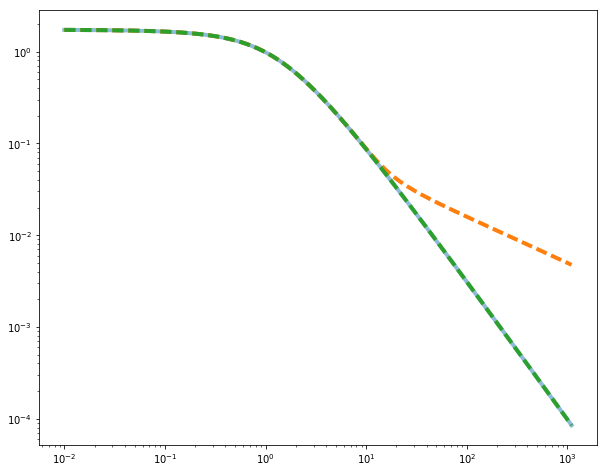

In [17]:
figure(figsize=(10, 8))

plot(red_shift_array, 1/hubble_array_0, lw=4, alpha=0.5)
plot(red_shift_array, 1/hubble_array_1, lw=4, ls='--')

z = red_shift_array
hubble_base = sqrt((lamb + rho_r * (1 + z) ** 4 + rho_m * (1 + z) ** 3) / 3)

plot(red_shift_array, 1/hubble_base, lw=4, ls='--')

xscale('log')
yscale('log')